In [73]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages i need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Machine learning libraries used to build a decision tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df_car = pd.read_csv('CarPrice_data.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [75]:
df_car.shape

(205, 26)

In [76]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [77]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [78]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
df_car.duplicated().sum()

0

In [80]:
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

df_car.CarName.unique()

In [81]:
# These are the categorical columns in our Dataset
df_car.columns[df_car.dtypes == 'object']

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

## Univariate Analysis of some categprical values

In [82]:
print(df_car['enginetype'].value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginetype', ylabel='count'>

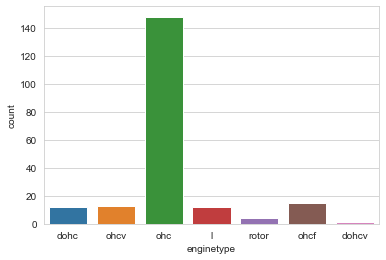

In [83]:
sns.countplot(df_car['enginetype'])

In [84]:
print(df_car['carbody'].value_counts())

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carbody', ylabel='count'>

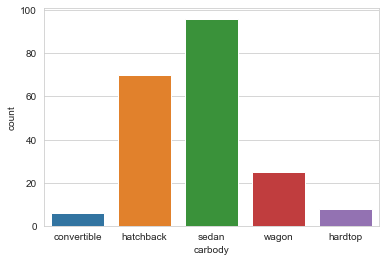

In [85]:
sns.countplot(df_car['carbody'])

In [86]:
print(df_car['fueltype'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fueltype', ylabel='count'>

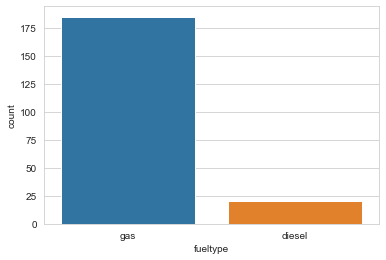

In [87]:
sns.countplot(df_car['fueltype'])

In [88]:
print(df_car['doornumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='doornumber', ylabel='count'>

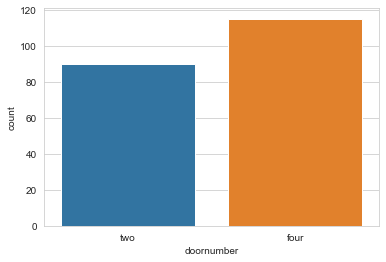

In [89]:
sns.countplot(df_car['doornumber'])

In [90]:
print(df_car['enginelocation'].value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginelocation', ylabel='count'>

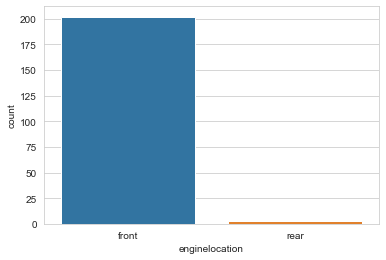

In [91]:
sns.countplot(df_car['enginelocation'])

In [92]:
print(df_car['drivewheel'].value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivewheel', ylabel='count'>

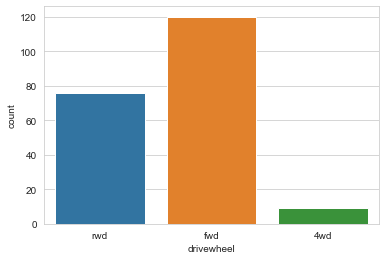

In [93]:
sns.countplot(df_car['drivewheel'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


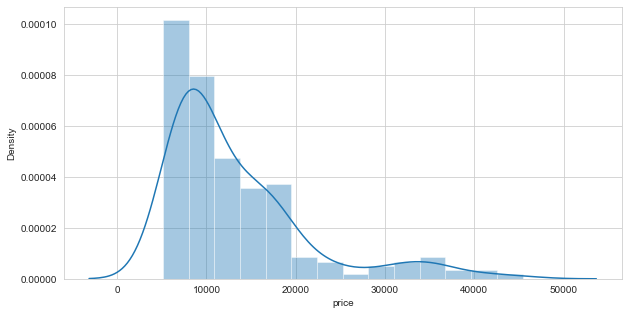

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.distplot(df_car.price)
plt.show()

## Bivaraite Analysis and visuallazation of some data

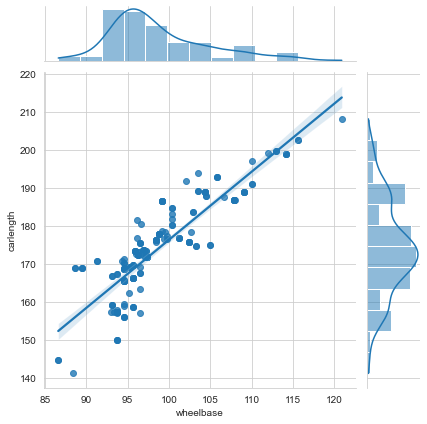

In [95]:
sns.jointplot(x='wheelbase', y='carlength', data=df_car, kind='reg')

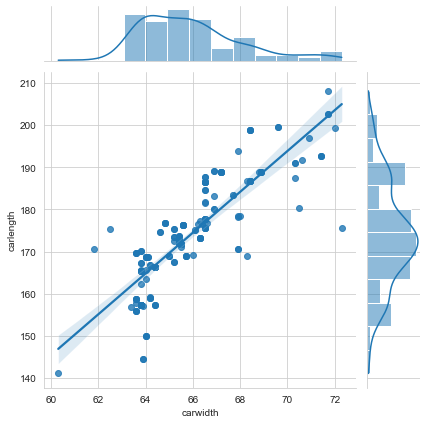

In [96]:
sns.jointplot(x='carwidth', y='carlength', data=df_car, kind='reg')

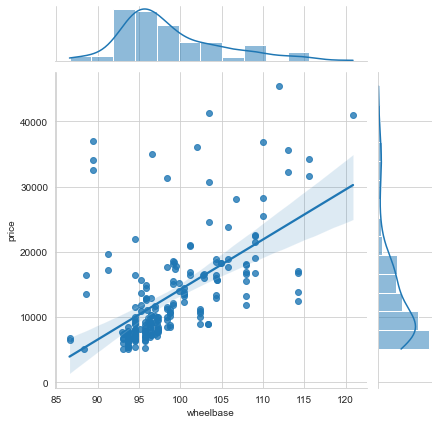

In [97]:
sns.jointplot(x='wheelbase', y='price', data=df_car, kind='reg')

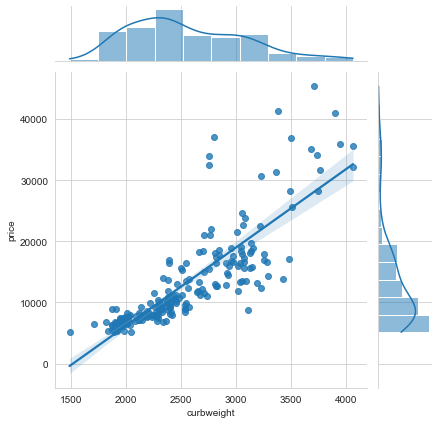

In [98]:
sns.jointplot(x='curbweight', y='price', data=df_car, kind='reg')

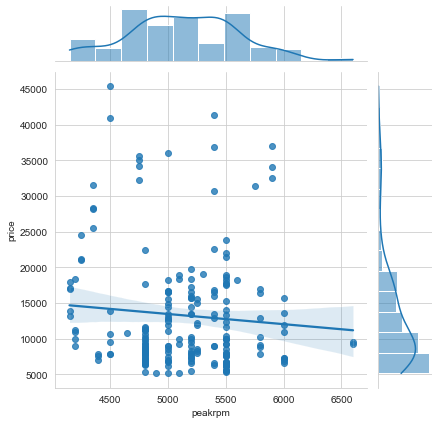

In [99]:
sns.jointplot(x='peakrpm', y='price', data=df_car, kind='reg')

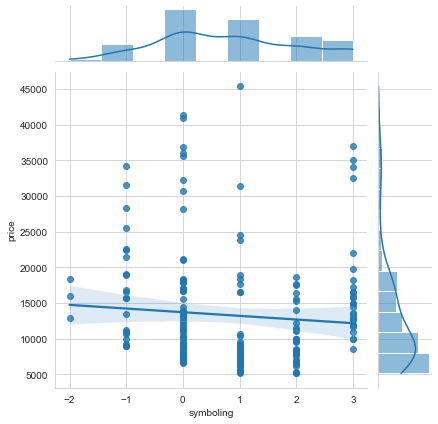

In [100]:
sns.jointplot(x='symboling', y='price', data=df_car, kind='reg')

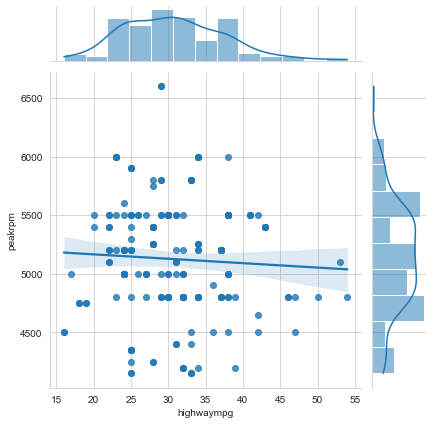

In [101]:
sns.jointplot(x='highwaympg', y='peakrpm', data=df_car, kind='reg')

## Correlation among all the features of the dataset

In [102]:
print(df_car.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

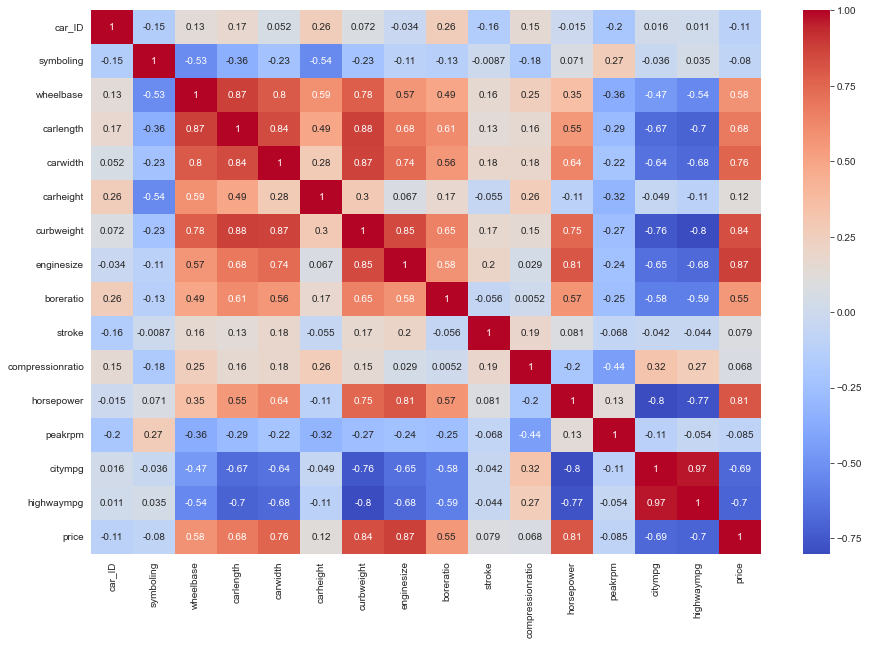

In [103]:
plt.figure(figsize=(15, 10))
correlations = df_car.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

## Encoding the categorical dataset

In [104]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Ten columns have categorical text info, and we convert them to numbers
df_car['CarName'] = label_encoder.fit_transform(df_car['CarName'])
df_car['fueltype'] = label_encoder.fit_transform(df_car['fueltype'])
df_car['aspiration'] = label_encoder.fit_transform(df_car['aspiration'])
df_car['doornumber'] = label_encoder.fit_transform(df_car['doornumber'])
df_car['carbody'] = label_encoder.fit_transform(df_car['carbody'])
df_car['drivewheel'] = label_encoder.fit_transform(df_car['drivewheel'])
df_car['enginelocation'] = label_encoder.fit_transform(df_car['enginelocation'])
df_car['enginetype'] = label_encoder.fit_transform(df_car['enginetype'])
df_car['cylindernumber'] = label_encoder.fit_transform(df_car['cylindernumber'])
df_car['fuelsystem'] = label_encoder.fit_transform(df_car['fuelsystem'])

In [105]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## Spliting our dataset into Training data and Test data

In [106]:
x = df_car.drop(['CarName', 'price'], axis=1)
y = df_car['price']

In [107]:
print(x)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         1           0           1        0           2   
1         2          3         1           0           1        0           2   
2         3          1         1           0           1        2           2   
3         4          2         1           0           0        3           1   
4         5          2         1           0           0        3           0   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         1           0           0        3           2   
201     202         -1         1           1           0        3           2   
202     203         -1         1           0           0        3           2   
203     204         -1         0           1           0        3           2   
204     205         -1         1           1           0        3           2   

     enginelocation  wheelb

In [108]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [109]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.72362229,  1.74347043,  0.32879797, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.70672403,  1.74347043,  0.32879797, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.68982577,  0.133509  ,  0.32879797, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.68982577, -1.47645244,  0.32879797, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.70672403, -1.47645244, -3.04138127, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72362229, -1.47645244,  0.32879797, ...,  0.57769233,
        -0.95301169, -0.83719538]])

## Spliting the Training and Test data

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [111]:
# Loading the Linear Regression model
lin_reg_model = LinearRegression()

In [112]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [113]:
# Prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [114]:
print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

13027.082327211067
[ -944.44938851   402.93303418  2009.41522716   344.77329897
  -894.94065958  -983.96311826   787.05591631  1506.08088648
  1538.98393347  -806.55146436  1196.97468252   130.66522536
  2054.87679402   174.04165484  -229.54600006  2916.59227503
  -139.66648537  -811.3072389   -999.56289595  2472.47882053
   699.92054736   607.45067323 -1455.16148816   814.80159455]


In [115]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.9128590262398171


In [116]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [117]:
print('MAE: ', (metrics.mean_absolute_error(training_data_prediction, y_train)))
print('MSE: ', (metrics.mean_squared_error(training_data_prediction, y_train)))

MAE:  1793.547761120616
MSE:  5438738.092480078


## Visualazation of actaul price and predicted price

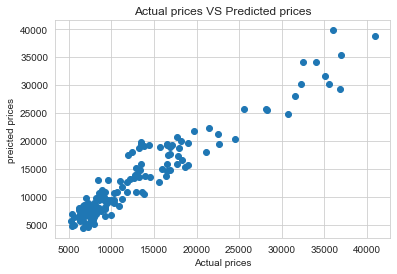

In [118]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('preicted prices')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [119]:
Result=pd.DataFrame({"Actual_Price":y_train,"Predicted_Price":training_data_prediction})
Result.head(15)

,Actual_Price,Predicted_Price
40,10295.0,8938.291073
60,8495.0,10715.852247
56,11845.0,10816.507061
101,13499.0,19861.011720
86,8189.0,9877.861711
19,6295.0,6942.278428
155,8778.0,7410.979771
97,7999.0,5111.696803
54,7395.0,6554.194707
184,7995.0,8343.075770


In [120]:
# Prediction on the test data
test_data_prediction = lin_reg_model.predict(x_test)

In [121]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.8179017654178393


In [122]:
print('MAE: ', (metrics.mean_absolute_error(test_data_prediction, y_test)))
print('MSE: ', (metrics.mean_squared_error(test_data_prediction, y_test)))

MAE:  2366.972166056516
MSE:  12025288.582615016


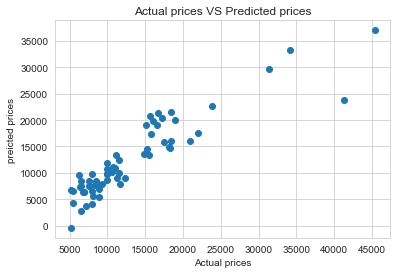

In [123]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('preicted prices')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [124]:
Result=pd.DataFrame({"Actual_Price":y_test,"Predicted_price":test_data_prediction})
Result.head(15)

,Actual_Price,Predicted_price
52,6795.0,6407.676468
181,15750.0,17329.531478
5,15250.0,14456.825377
18,5151.0,-439.134074
188,9995.0,9782.233527
170,11199.0,13474.212786
76,5389.0,6507.749007
154,7898.0,4182.867795
104,17199.0,20389.619336
33,6529.0,8368.438945
